In [2]:
import pandas as pd
import numpy as np

## 1. Luchtkwaliteit dataset inlezen
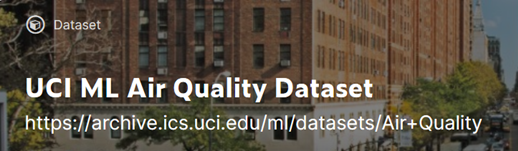

In [3]:
df = pd.read_csv("data/AirQualityUCI.csv")
df.head()

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11/23/2004,19:00:00,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High
1,11/23/2004,20:00:00,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High
2,11/17/2004,18:00:00,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High
3,11/23/2004,18:00:00,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High
4,11/26/2004,18:00:00,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,Very High


## 2.  Beschijving kolomnamen
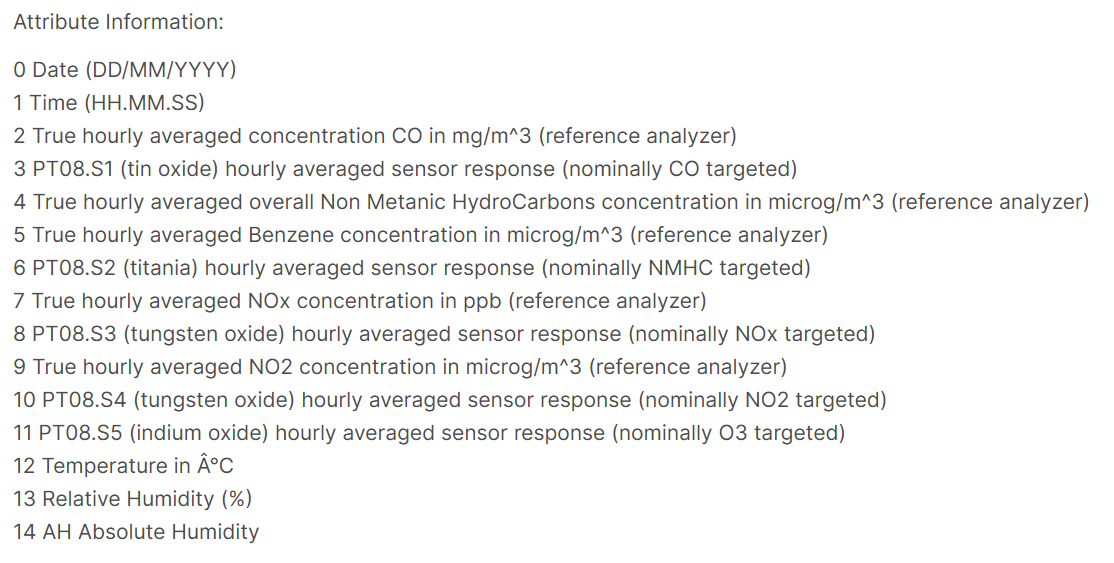

## 3. Luchtkwaliteit samenvattende statistiek bekijken

In [4]:
df.describe()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
count,7674.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.152750,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,1.453252,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,0.100000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,1.100000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.800000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.900000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


## 4. Data cleaning

### 4.1 Vreemde waardes

De min waarde is vaak -200, wat kan er aan de hand zijn? 
https://www.kaggle.com/nishantbhadauria/datasetucimlairquality --> Missing values zijn als -200 gecodeerd

In [5]:
df.replace(-200, np.nan, inplace=True)
df.describe()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
count,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.152750,1099.833166,218.811816,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,1.453252,217.080037,204.459921,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,937.000000,67.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.900000,1231.000000,297.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


### 4.2 Missende waardes


In [9]:
print("number of rows in the dataset: ", df.shape[0])

number of rows in the dataset:  9357


Het aantal keer dat de referentiewaarde voor benzeen is gemeten is wel erg laag, 8443/9357. Laten we deze kolom maar weglaten uit de analyse

In [7]:
df.isnull().sum()

Date               0
Time               0
CO_GT           1683
PT08_S1_CO       366
NMHC_GT         8443
C6H6_GT          366
PT08_S2_NMHC     366
Nox_GT          1639
PT08_S3_Nox      366
NO2_GT          1642
PT08_S4_NO2      366
PT08_S5_O3       366
T                366
RH               366
AH               366
CO_level           0
dtype: int64

In [12]:
df.drop(['NMHC_GT'], inplace=True, axis=1)

## 5. Opgeschoonde data opslaan

In [43]:
df.to_csv("data/cleaned_airquality.csv", index=0, sep=",")

## 6 . Hypotetische casus: voorspellen van indium oxide aan de hand van de overige metingen PT08_S5_O3
Ga naar Azure ML Studio om eenvoudig te beginnen met Machine Learning
https://studio.azureml.net/
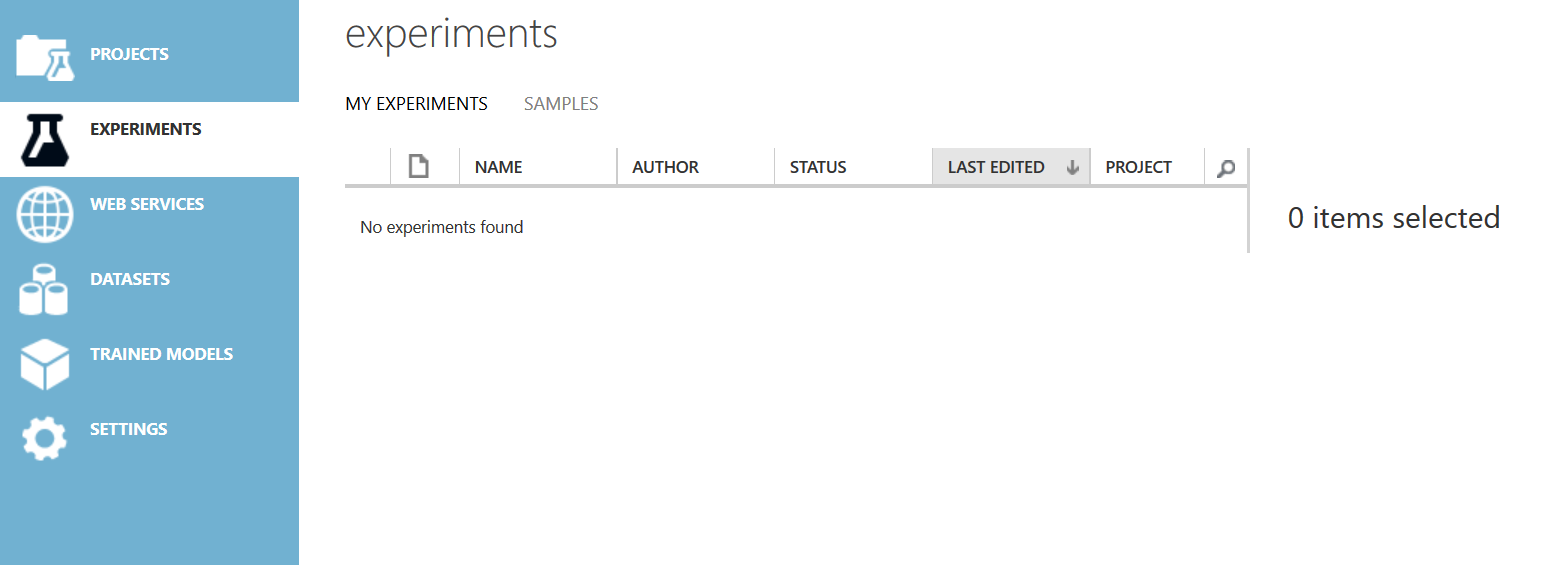

## 7. Opzet regressie model, R squared van 0.95 (!)
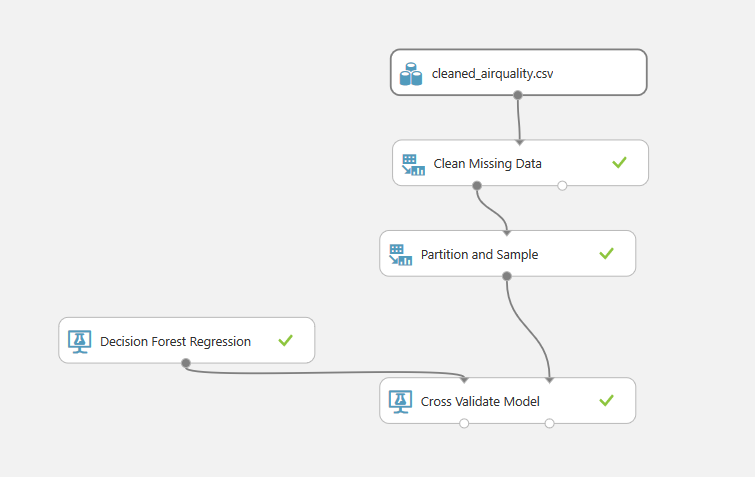


# Goede libraries om mee te werken in Python je als geavanceerdere analyses wilt doen dan beschikbaar in Azure ML studio:
- XGBoost https://xgboost.readthedocs.io/en/latest/ --> Zowel Python als R
- H2O https://www.h2o.ai/ --> Zowel Python als R
- Scikit-learn https://scikit-learn.org/stable/index.html

# 6. Zelf een model makenmet h2o


In [ ]:
# To shutdown the h2o cluster, run below. Note that data uploaded to the h2o cluster between notebooks / runs will still exist
# so it is important to use unique names when sending a dataframe to the cluster
import h2o
from h2o.automl import H2OAutoML
h2o.init()
# h2o.cluster().shutdown()

In [56]:
iot_df = pd.read_csv("data/cleaned_airquality.csv").reset_index()

In [57]:
y = iot_df["PT08_S5_O3"]

In [58]:
iot_df_clean = iot_df.drop(columns = ['PT08_S5_O3',"Date","Time","CO_level"])
iot_df_clean

,index,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,T,RH,AH
0,0,11.9,2008.0,50.6,1980.0,1389.0,325.0,220.0,2562.0,12.4,74.7,1.0741
1,1,11.5,1918.0,49.4,1958.0,1358.0,335.0,190.0,2477.0,11.5,76.2,1.0324
2,2,10.2,1802.0,47.7,1924.0,748.0,356.0,192.0,2235.0,13.7,52.8,0.8244
3,3,10.2,1982.0,49.5,1959.0,1369.0,322.0,227.0,2536.0,13.2,72.6,1.0936
4,4,10.1,1956.0,45.2,1877.0,1389.0,347.0,255.0,2338.0,15.5,62.8,1.0979
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,9352,NaN,993.0,2.3,604.0,85.0,848.0,65.0,1160.0,14.5,66.4,1.0919
9353,9353,NaN,1122.0,6.0,811.0,181.0,641.0,92.0,1336.0,16.2,71.2,1.3013
9354,9354,NaN,883.0,1.3,530.0,63.0,997.0,46.0,1102.0,13.7,68.2,1.0611
9355,9355,NaN,818.0,0.8,473.0,47.0,1257.0,41.0,898.0,13.7,48.8,0.7606


In [77]:
h2o_frame = pd.concat([feature_df, y], axis=1)

In [97]:
## Send the dataframe to h2o
hf = h2o.H2OFrame(iot_df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [98]:
# Predictor columns
predictors = list(hf.columns) 
predictors.remove('PT08_S5_O3')
y = 'PT08_S5_O3'

In [ ]:
## Train a ten models to filter out the most uninformative columns; will run for a few minutes
aml = H2OAutoML(max_runtime_secs = 60, 
                max_models = 5,
                stopping_metric = "MSE",
               keep_cross_validation_predictions = True, 
               keep_cross_validation_models = True,
                sort_metric = "MSE",                
               nfolds = 10,
               verbosity = 'info')
aml.train(x = predictors, y = y, training_frame = hf)

AutoML progress: |
08:10:01.987: Project: automl_Key_Frame__upload_86b0896a6b3ab8af470fa02bd62b4299.hex
08:10:01.987: AutoML job created: 2020.10.02 08:10:01.987
08:10:01.987: AutoML: XGBoost is not available; skipping it.
08:10:01.987: Disabling Algo: XGBoost as requested by the user.
08:10:01.988: Build control seed: -1 (random)
08:10:01.988: training frame: Frame key: automl_training_Key_Frame__upload_86b0896a6b3ab8af470fa02bd62b4299.hex    cols: 16    rows: 9357  chunks: 1    size: 394966  checksum: 8007667350284830228
08:10:01.988: validation frame: NULL
08:10:01.988: leaderboard frame: NULL
08:10:01.988: blending frame: NULL
08:10:01.988: response column: PT08_S5_O3
08:10:01.988: fold column: null
08:10:01.988: weights column: null
08:10:01.991: Setting stopping tolerance adaptively based on the training frame: 0.010337884727500772
08:10:01.992: AutoML build started: 2020.10.02 08:10:01.992
08:10:01.992: AutoML: starting GLM hyperparameter search


08:10:03.8: New leader: GLM_gri

In [ ]:
## Train a ten models to filter out the most uninformative columns; will run for a few minutes
aml = H2O.x(max_runtime_secs = 120, 
                max_models = 5,
                stopping_metric = "MSE",
               keep_cross_validation_predictions = True, 
               keep_cross_validation_models = True,
                sort_metric = "MSE",                
               nfolds = 10,
               verbosity = 'info')
aml.train(x = predictors, y = y, training_frame = hf)

In [109]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20201002_081001

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 1510.1771555897085
RMSE: 38.860997871769946
MAE: 27.87016558678365
RMSLE: 0.03945577392662007
R^2: 0.9904883951695089
Mean Residual Deviance: 1510.1771555897085
Null degrees of freedom: 8990
Residual degrees of freedom: 8988
Null deviance: 1427519650.772329
Residual deviance: 13578002.805907069
AIC: 91337.31306447512

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 9045.600208602289
RMSE: 95.10836035071938
MAE: 69.06366448106962
RMSLE: 0.09687868690075009
R^2: 0.943027760471429
Mean Residual Deviance: 9045.600208602289
Null degrees of freedom: 8990
Residual degrees of freedom: 8988
Null deviance: 1442140454.8095598
Residual deviance: 81328991.47554319
AIC: 107431.6661834433


# Next steps?

### Model langer laten trainen

### Feature engineering
...

In [ ]:
import featuretools as ft
from featuretools.primitives import make_trans_primitive
from featuretools.variable_types import Numeric

In [ ]:
## A primitive is a function to apply and summarize columns. 
## It is also possible to define your own primitives, see log and sqrt examples

# Create plant data entity
es = es.entity_from_dataframe(
    entity_id='iotdata',
    dataframe=iot_df_clean,
    index='index')

agg_primitives=[
        'std', 'min', 'max', 'mean', 
            'trend', 'mode', 'median','skew'
]

trans_primitives =['add_numeric', 'divide_by_feature', 'cum_max','cum_min','cum_mean','subtract_numeric', 'multiply_numeric'
]

# Create additional primitives
log_prim = make_trans_primitive(
    function=Log, input_types=[Numeric], return_type=Numeric)
square_root_prim = make_trans_primitive(
    function=Square_Root, input_types=[Numeric], return_type=Numeric)
# Append primitives to earlier select primitives
trans_primitives.append(log_prim)
trans_primitives.append(square_root_prim)

## To list all available primitives, check
# ft.list_primitives()

## Featuretools creates grouped features and derivaties of existing predictors, which can be simple like the median week temperature. 
# With current settings, 242 columns will be added
### Create a named entity set for automatic feature engineering
es = ft.EntitySet(id = 'sample_data')
features, feature_names = ft.dfs(
    entityset=es,
    target_entity='iotdata',
    agg_primitives=agg_primitives,
    trans_primitives=trans_primitives,
    ignore_variables={'iot_df_clean': ['index']},
    max_depth = 1,
    n_jobs=4,
    verbose=True)
# Add the created features to the cleaned dataset
cols_to_use = features.columns.difference(iot_df.columns)
# Join the agrregated features to plant data
cols_to_use = features.columns.difference(iot_df.columns)
feature_df = pd.merge(iot_df_clean, features[cols_to_use], how='left', on='index')

# Remove spaces in column names
feature_df.columns = feature_df.columns.str.replace(' ', '')
